In [0]:
#Filter LPF orde 1 
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
def toHz(value):
    from numpy import pi
    return value/2/pi

In [0]:
f_cut = 1000
w_cut = 2*np.pi*f_cut

In [0]:
num_L1 = np.array([w_cut])
den_L1 = np.array([1., w_cut])
s_L1 = sig.lti(num_L1, den_L1)
w_L1, m_L1, P_L1 = sig.bode(s_L1)

num_H1 = np.array([1., 0.])
den_H1 = np.array([1., w_cut])
s_H1 = sig.lti(num_H1, den_H1)
w_H1, m_H1, P_H1 = sig.bode(s_H1)

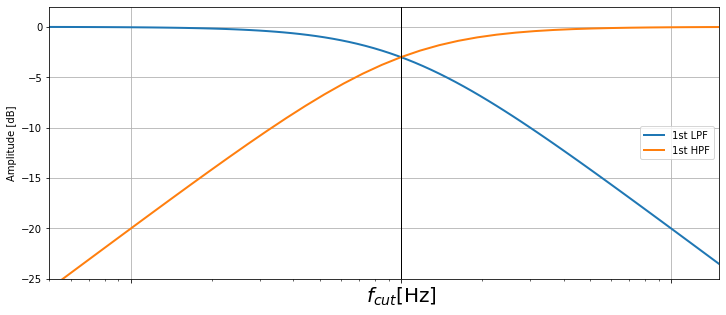

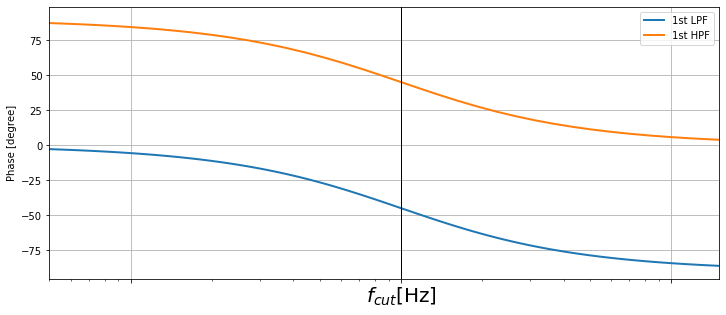

In [5]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L1), m_L1, lw=2, label='1st LPF')
plt.semilogx(toHz(w_H1), m_H1, lw=2, label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylim(-25, 2)
plt.ylabel('Amplitude [dB]')
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.legend()
plt.grid()

plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L1), P_L1, lw=2, label='1st LPF')
plt.semilogx(toHz(w_H1), P_H1, lw=2, label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylabel('Phase [degree]')
plt.legend()
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.grid()

plt.show()

In [0]:
#desain filter
def get1stFilterCoeffi(f_cut, ts, isLPF):
    from numpy import pi
    
    w_cut = 2*pi*f_cut
    tau = 1/w_cut
    
    tau_ts = 1/(tau+ts)
    if isLPF=='LPF':
        return -tau*tau_ts, ts*tau_ts, 0
    elif isLPF=='HPF':
        return -tau*tau_ts, tau*tau_ts, -tau*tau_ts

In [0]:
def direct2FormModel(data, a1, a2, b0, b1, b2):
    from numpy import zeros, arange
    
    result = zeros((len(data),))
    timeZone = zeros((len(data),))
    
    for n in arange(2, len(data)):
        sum0 = -a1*timeZone[n-1] - a2*timeZone[n-2]
        timeZone[n] = data[n] + sum0
        result[n] = b0*timeZone[n] + b1*timeZone[n-1] + b2*timeZone[n-2]
        
    return result

In [0]:
def d2f_1st(data, a1, b0, b1):
    return direct2FormModel(data, a1, 0, b0, b1, 0)

In [0]:
get1stFilterCoeffi(100, 1/1000, 1)

In [0]:


get1stFilterCoeffi(100, 1/1000, 0)



In [0]:
#Simulasi LPF/HPF orde 1 pada continuous system
def draw_FFT_Graph(data, fs, **kwargs):
    from numpy.fft import fft
    import matplotlib.pyplot as plt
    
    graphStyle = kwargs.get('style', 0)
    xlim = kwargs.get('xlim', 0)
    ylim = kwargs.get('ylim', 0)
    title = kwargs.get('title', 'FFT result')
    
    n = len(data)
    k = np.arange(n)
    T = n/Fs
    freq = k/T 
    freq = freq[range(int(n/2))]
    FFT_data = fft(data)/n 
    FFT_data = FFT_data[range(int(n/2))]
    
    plt.figure(figsize=(12,5))
    if graphStyle == 0:
        plt.plot(freq, abs(FFT_data), 'r', linestyle=' ', marker='^') 
    else:
        plt.plot(freq,abs(FFT_data),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.vlines(freq, [0], abs(FFT_data))
    plt.title(title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

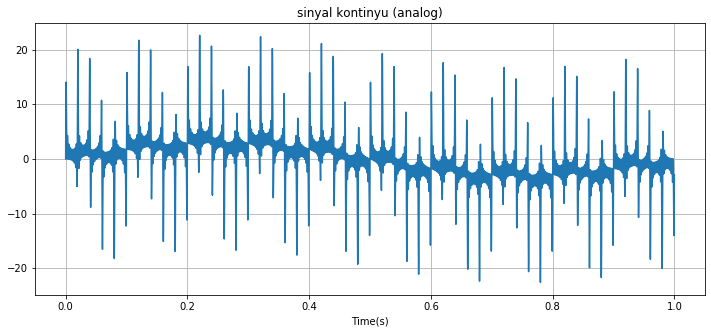

In [15]:
# membuat Sinyal test
Fs = 10*10**3               # 10kHz
Ts = 1/Fs                   # sample Time
endTime = 1
t = np.arange(0.0, endTime, Ts)

inputSig = 3.*np.sin(2.*np.pi*t)

sampleFreq = np.arange(10,500,50)

for freq in sampleFreq:
    inputSig = inputSig + 2*np.sin(2*np.pi*freq*t)
    
plt.figure(figsize=(12,5))
plt.plot(t, inputSig)
plt.xlabel('Time(s)')
plt.title('sinyal kontinyu (analog)')
plt.grid(True)
plt.show()

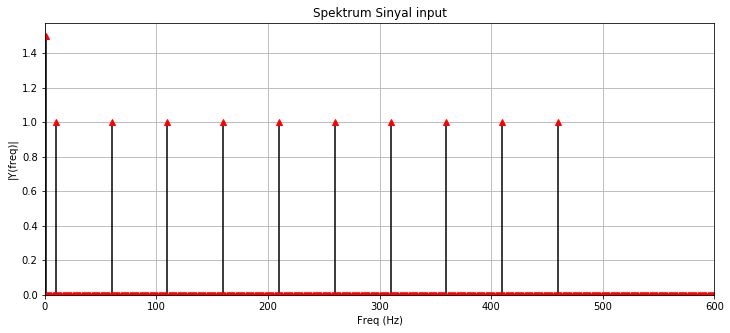

In [14]:
draw_FFT_Graph(inputSig, Fs, title='Spektrum Sinyal input', xlim=(0, 600))

In [0]:
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'LPF')
dataLPF = d2f_1st(inputSig, a1, b0, b1)

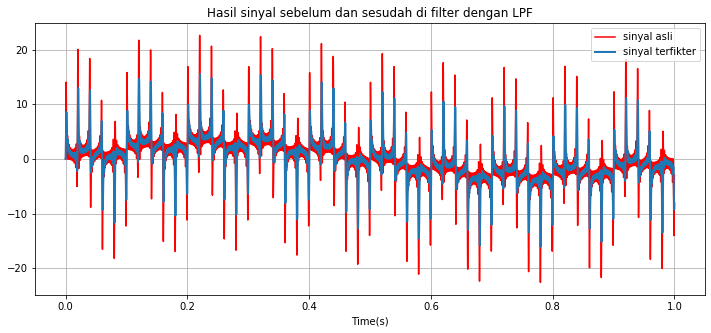

In [0]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='sinyal asli')
plt.plot(t, dataLPF, lw=2, label='sinyal terfikter')
plt.xlabel('Time(s)')
plt.title('Hasil sinyal sebelum dan sesudah di filter dengan LPF')
plt.legend()
plt.grid(True)
plt.show()

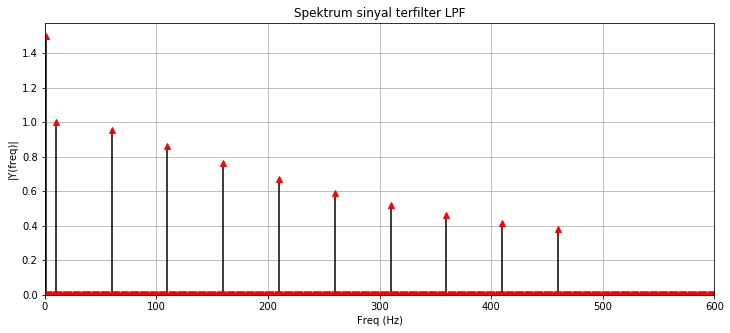

In [0]:
draw_FFT_Graph(dataLPF, Fs, title='Spektrum grafik filter LPF', xlim=(0, 600))

In [0]:
20*np.log10(0.7/1.0)

-3.0980391997148637

In [0]:
#FILTER HPF
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'HPF')
dataHPF = d2f_1st(inputSig, a1, b0, b1)

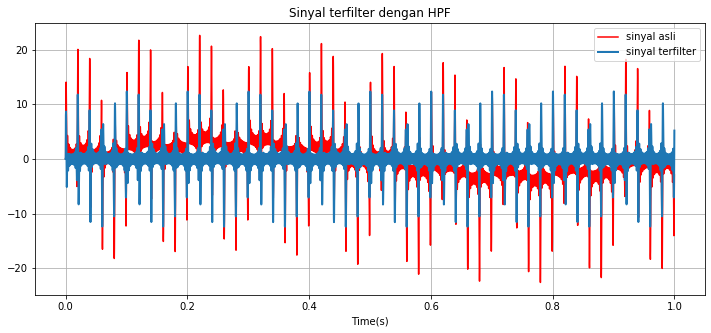

In [0]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='sinyal asli')
plt.plot(t, dataHPF, lw=2, label='sinyal terfilter')
plt.xlabel('Time(s)')
plt.title('Sinyal terfilter dengan HPF')
plt.legend()
plt.grid(True)
plt.show()

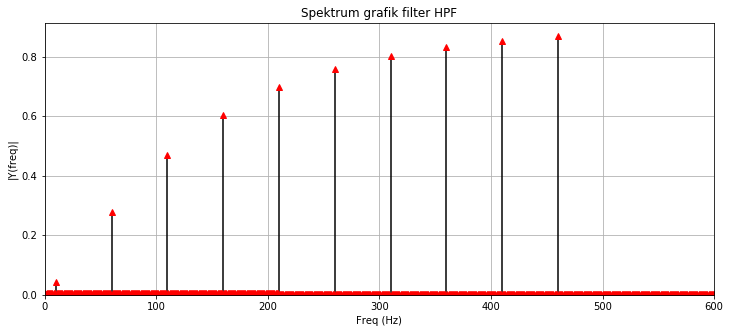

In [0]:
draw_FFT_Graph(dataHPF, Fs, title='Spektrum grafik filter HPF', xlim=(0, 600))

In [0]:
#BPF_BSF orde 2
def direct2FormModel(data, a1, a2, b0, b1, b2):
    from numpy import zeros, arange
    
    result = zeros((len(data),))
    timeZone = zeros((len(data),))
    
    for n in arange(2, len(data)):
        sum0 = -a1*timeZone[n-1] - a2*timeZone[n-2]
        timeZone[n] = data[n] + sum0
        result[n] = b0*timeZone[n] + b1*timeZone[n-1] + b2*timeZone[n-2]
        
    return result

In [0]:
def toHz(value):
    from numpy import pi
    return value/2/pi

In [0]:
def draw_FFT_Graph(data, fs, **kwargs):
    from numpy.fft import fft
    import matplotlib.pyplot as plt
    
    graphStyle = kwargs.get('style', 0)
    xlim = kwargs.get('xlim', 0)
    ylim = kwargs.get('ylim', 0)
    title = kwargs.get('title', 'FFT result')
    
    n = len(data)
    k = np.arange(n)
    T = n/Fs
    freq = k/T 
    freq = freq[range(int(n/2))]
    FFT_data = fft(data)/n 
    FFT_data = FFT_data[range(int(n/2))]
    
    plt.figure(figsize=(12,5))
    if graphStyle == 0:
        plt.plot(freq, abs(FFT_data), 'r', linestyle=' ', marker='^') 
    else:
        plt.plot(freq,abs(FFT_data),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.vlines(freq, [0], abs(FFT_data))
    plt.title(title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [0]:
def getBPFCoeffi(f_peak, bandWidth, Ts):
    from numpy import pi
    
    w0_peak = 2*np.pi*f_peak
    
    Q = f_peak/bandWidth
    H = 1/w0_peak
    H0 = H/Q
    
    b0_ = 2*H0*w0_peak**2/Ts
    b1_ = 0
    b2_ = -2*H0*w0_peak**2/Ts
    
    a0_ = 4/Ts**2+2*w0_peak/Q/Ts+w0_peak**2
    a1_ = -8/Ts**2+2*w0_peak**2
    a2_ = 4/Ts**2-2*w0_peak/Q/Ts+w0_peak**2
    
    return a1_/a0_, a2_/a0_, b0_/a0_, b1_/a0_, b2_/a0_

In [0]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
# Band Pass Filter pada sinyal kontinyu (analog)
f_peak = 1000
w0_peak = 2*np.pi*f_peak
bandWidth = 400
Q = f_peak/bandWidth
H = 1/w0_peak
H0 = H/Q

num = np.array([H0*w0_peak**2, 0])
den = np.array([1, w0_peak/Q, w0_peak**2])

s = sig.lti(num, den)
w, m, p = sig.bode(s, n=10000)

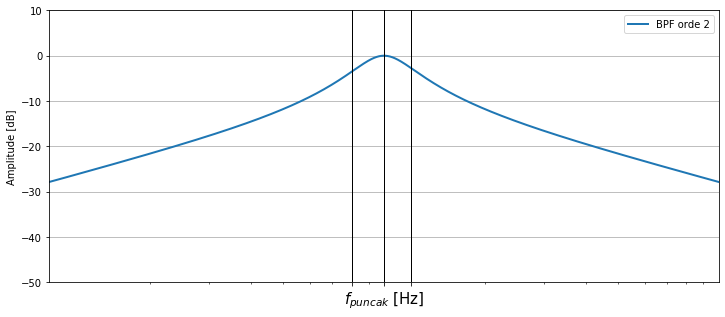

In [0]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w), m, lw=2, label='BPF orde 2')
plt.axvline(f_peak+bandWidth/2, color='k', lw=1)
plt.axvline(f_peak, color='k', lw=1)
plt.axvline(f_peak-bandWidth/2, color='k', lw=1)
plt.xlim(10**2, 10**4)
plt.ylim(-50, 10)
plt.ylabel('Amplitude [dB]')
plt.xticks([f_peak+bandWidth/2, f_peak, f_peak-bandWidth/2], ('','$f_{puncak}$ [Hz]',''), fontsize = 15)
plt.legend()
plt.grid()
plt.show()

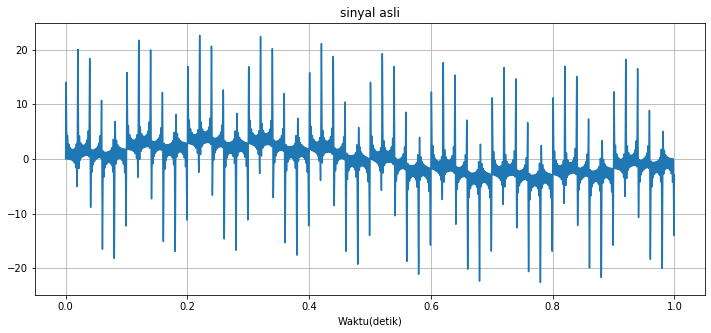

In [0]:
# membangkitkan sinyal unruk difilter
Fs = 10*10**3               # 10kHz
Ts = 1/Fs                   # sample Time
endTime = 1
t = np.arange(0.0, endTime, Ts)

inputSig = 3.*np.sin(2.*np.pi*t)

sampleFreq = np.arange(10,500,50)

for freq in sampleFreq:
    inputSig = inputSig + 2*np.sin(2*np.pi*freq*t)
    
plt.figure(figsize=(12,5))
plt.plot(t, inputSig)
plt.xlabel('Waktu(detik)')
plt.title('sinyal asli')
plt.grid(True)
plt.show()

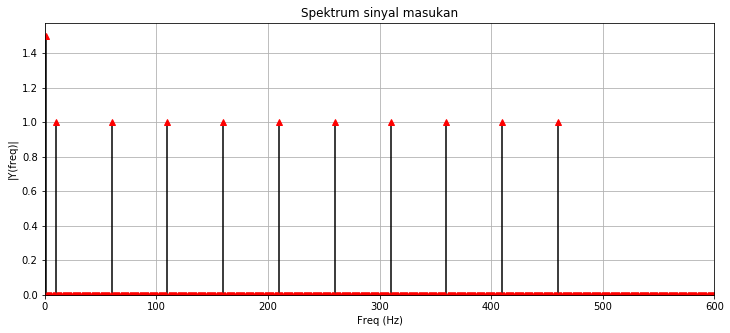

In [0]:
draw_FFT_Graph(inputSig, Fs, title='Spektrum sinyal masukan', xlim=(0, 600))

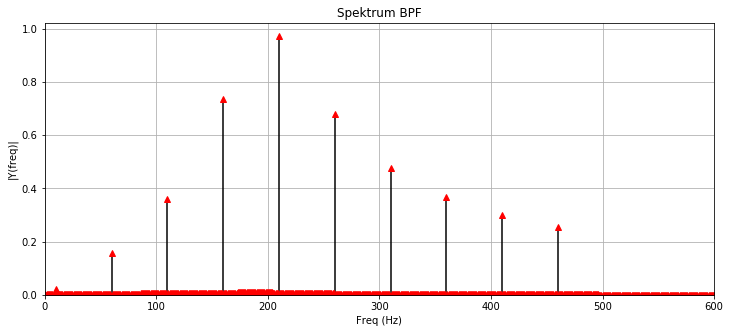

In [0]:
a1, a2, b0, b1, b2 = getBPFCoeffi(200, 100, Ts)
dataBPF = direct2FormModel(inputSig, a1, a2, b0, b1, b2)
draw_FFT_Graph(dataBPF, Fs, title='Spektrum BPF', xlim=(0, 600))

In [0]:
# Band Stop Filter sinyal kontinyu
f_peak = 1000
w0_peak = 2*np.pi*f_peak
bandWidth = 400
Q = f_peak/bandWidth
H0 = 1

num = np.array([H0,0,H0*w0_peak**2])
den = np.array([1, w0_peak/Q, w0_peak**2])

s = sig.lti(num, den)
w, m, p = sig.bode(s, n=10000)

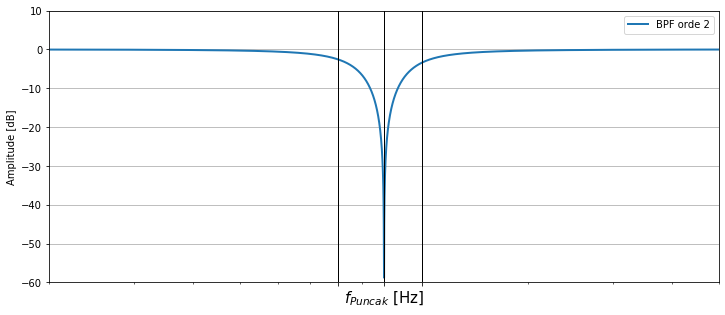

In [0]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w), m, lw=2, label='BPF orde 2')
plt.axvline(f_peak+bandWidth/2, color='k', lw=1)
plt.axvline(f_peak, color='k', lw=1)
plt.axvline(f_peak-bandWidth/2, color='k', lw=1)
plt.xlim(2*10**2, 5000)
plt.ylim(-60, 10)
plt.ylabel('Amplitude [dB]')
plt.xticks([f_peak+bandWidth/2, f_peak, f_peak-bandWidth/2], ('','$f_{Puncak}$ [Hz]',''), fontsize = 15)
plt.legend()
plt.grid()
plt.show()

In [0]:
def getBSFCoeffi(f_peak, bandWidth, Ts):
    from numpy import pi
    
    w0_peak = 2*np.pi*f_peak
    Q = f_peak/bandWidth
    H0 = 1
    
    b0_ = H0*4/Ts**2 + H0*w0_peak**2
    b1_ = -2*H0*4/Ts**2 + 2*w0_peak**2
    b2_ = H0*4/Ts**2 + H0*w0_peak**2
    
    a0_ = 4/Ts**2+2*w0_peak/Q/Ts+w0_peak**2
    a1_ = -8/Ts**2+2*w0_peak**2
    a2_ = 4/Ts**2-2*w0_peak/Q/Ts+w0_peak**2
    
    return a1_/a0_, a2_/a0_, b0_/a0_, b1_/a0_, b2_/a0_

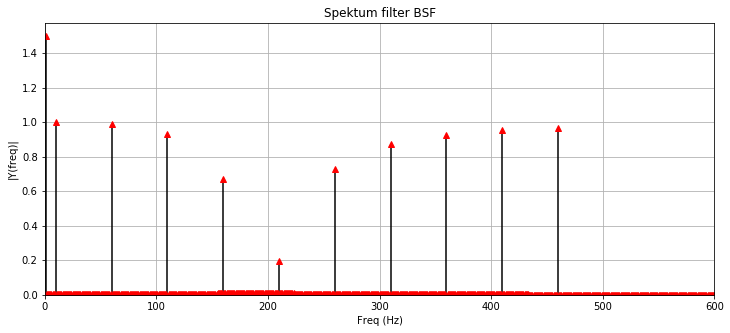

In [0]:


a1, a2, b0, b1, b2 = getBSFCoeffi(200, 100, Ts)
dataBSF = direct2FormModel(inputSig, a1, a2, b0, b1, b2)
draw_FFT_Graph(dataBSF, Fs, title='Spektum filter BSF', xlim=(0, 600))



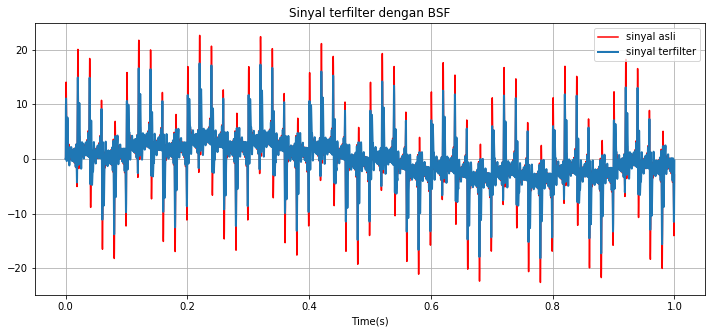

In [0]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='sinyal asli')
plt.plot(t, dataBSF, lw=2, label='sinyal terfilter')
plt.xlabel('Time(s)')
plt.title('Sinyal terfilter dengan BSF')
plt.legend()
plt.grid(True)
plt.show()

In [0]:
#LPF HPF ORDE 2
def draw_FFT_Graph(data, fs, **kwargs):
    from numpy.fft import fft
    import matplotlib.pyplot as plt
    
    graphStyle = kwargs.get('style', 0)
    xlim = kwargs.get('xlim', 0)
    ylim = kwargs.get('ylim', 0)
    title = kwargs.get('title', 'FFT result')
    
    n = len(data)
    k = np.arange(n)
    T = n/Fs
    freq = k/T 
    freq = freq[range(int(n/2))]
    FFT_data = fft(data)/n 
    FFT_data = FFT_data[range(int(n/2))]
    
    plt.figure(figsize=(12,5))
    if graphStyle == 0:
        plt.plot(freq, abs(FFT_data), 'r', linestyle=' ', marker='^') 
    else:
        plt.plot(freq,abs(FFT_data),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.vlines(freq, [0], abs(FFT_data))
    plt.title(title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [0]:
def get1stFilterCoeffi(f_cut, ts, isLPF):
    from numpy import pi
    
    w_cut = 2*pi*f_cut
    tau = 1/w_cut
    
    tau_ts = 1/(tau+ts)
    if isLPF=='LPF':
        return -tau*tau_ts, ts*tau_ts, 0
    elif isLPF=='HPF':
        return -tau*tau_ts, tau*tau_ts, -tau*tau_ts

In [0]:
def direct2FormModel(data, a1, a2, b0, b1, b2):
    from numpy import zeros, arange
    
    result = zeros((len(data),))
    timeZone = zeros((len(data),))
    
    for n in arange(2, len(data)):
        sum0 = -a1*timeZone[n-1] - a2*timeZone[n-2]
        timeZone[n] = data[n] + sum0
        result[n] = b0*timeZone[n] + b1*timeZone[n-1] + b2*timeZone[n-2]
        
    return result

In [0]:
def d2f_1st(data, a1, b0, b1):
    return direct2FormModel(data, a1, 0, b0, b1, 0)

def d2f_2nd(data, a1, a2, b0, b1, b2):
    return direct2FormModel(data, a1, a2, b0, b1, b2)

In [0]:
def toHz(value):
    from numpy import pi
    return value/2/pi

In [0]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
f_cut = 1000
w_cut = 2*np.pi*f_cut

In [0]:
# ORDE 1
num_L1 = np.array([w_cut])
den_L1 = np.array([1., w_cut])
s_L1 = sig.lti(num_L1, den_L1)
w_L1, m_L1, P_L1 = sig.bode(s_L1)

num_H1 = np.array([1., 0.])
den_H1 = np.array([1., w_cut])
s_H1 = sig.lti(num_H1, den_H1)
w_H1, m_H1, P_H1 = sig.bode(s_H1)

In [0]:
# ORDE 2
H0 = 1
zeta = 1

Q = 1/2/zeta

num_L2 = np.array([H0*w_cut**2])
den_L2 = np.array([1, w_cut/Q, w_cut**2])
s_L2 = sig.lti(num_L2, den_L2)
w_L2, m_L2, P_L2 = sig.bode(s_L2)

num_H2 = np.array([H0, 0, 0])
den_H2 = np.array([1, w_cut/Q, w_cut**2])
s_H2 = sig.lti(num_H2, den_H2)
w_H2, m_H2, P_H2 = sig.bode(s_H2)

zeta = 0.1
Q = 1/2/zeta
den_2 = np.array([1, w_cut/Q, w_cut**2])

s_L21 = sig.lti(num_L2, den_2)
w_L21, m_L21, P_L21 = sig.bode(s_L21)
s_H21 = sig.lti(num_H2, den_2)
w_H21, m_H21, P_H21 = sig.bode(s_H21)

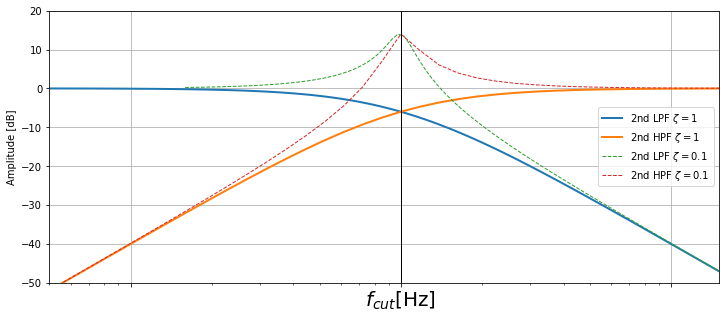

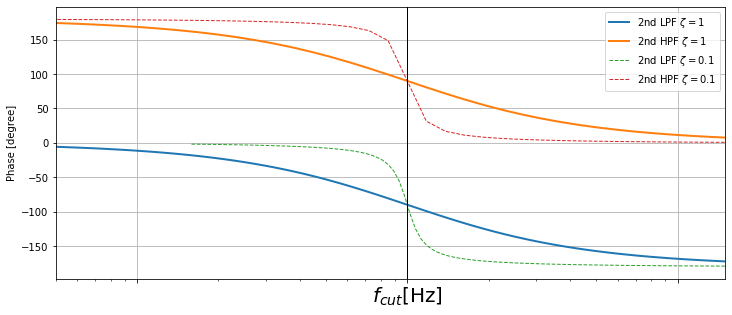

In [0]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L2), m_L2, lw=2, label='2nd LPF $\zeta =1$')
plt.semilogx(toHz(w_H2), m_H2, lw=2, label='2nd HPF $\zeta =1$')
plt.semilogx(toHz(w_L21), m_L21, lw=1, ls='dashed', label='2nd LPF $\zeta =0.1$')
plt.semilogx(toHz(w_H21), m_H21, lw=1, ls='dashed', label='2nd HPF $\zeta =0.1$')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylim(-50, 20)
plt.ylabel('Amplitude [dB]')
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.legend()
plt.grid()

plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L2), P_L2, lw=2, label='2nd LPF $\zeta =1$')
plt.semilogx(toHz(w_H2), P_H2, lw=2, label='2nd HPF $\zeta =1$')
plt.semilogx(toHz(w_L21), P_L21, lw=1, ls='dashed', label='2nd LPF $\zeta =0.1$')
plt.semilogx(toHz(w_H21), P_H21, lw=1, ls='dashed', label='2nd HPF $\zeta =0.1$')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylabel('Phase [degree]')
plt.legend()
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.grid()

plt.show()

In [0]:
H0 = 1
zeta = 1

Q = 1/2/zeta

num_L2 = np.array([H0*w_cut**2])
den_L2 = np.array([1, w_cut/Q, w_cut**2])
s_L2 = sig.lti(num_L2, den_L2)
w_L2, m_L2, P_L2 = sig.bode(s_L2)

num_H2 = np.array([H0, 0, 0])
den_H2 = np.array([1, w_cut/Q, w_cut**2])
s_H2 = sig.lti(num_H2, den_H2)
w_H2, m_H2, P_H2 = sig.bode(s_H2)

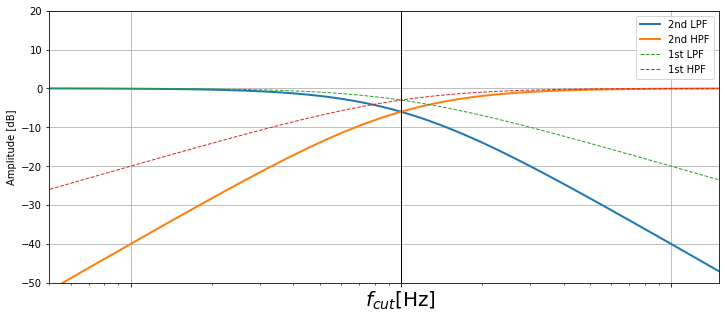

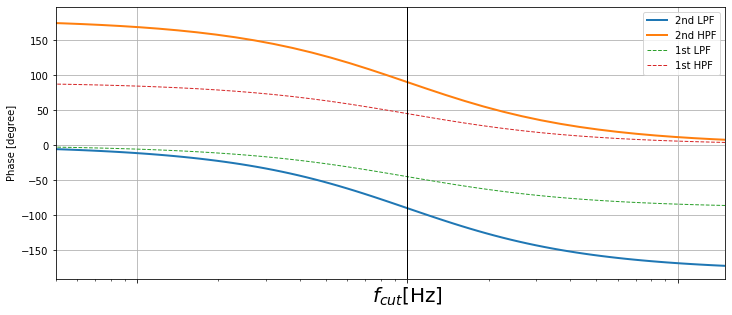

In [0]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L2), m_L2, lw=2, label='2nd LPF')
plt.semilogx(toHz(w_H2), m_H2, lw=2, label='2nd HPF')
plt.semilogx(toHz(w_L1), m_L1, lw=1, ls='dashed', label='1st LPF')
plt.semilogx(toHz(w_H1), m_H1, lw=1, ls='dashed', label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylim(-50, 20)
plt.ylabel('Amplitude [dB]')
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.legend()
plt.grid()

plt.figure(figsize=(12,5))
plt.semilogx(toHz(w_L2), P_L2, lw=2, label='2nd LPF')
plt.semilogx(toHz(w_H2), P_H2, lw=2, label='2nd HPF')
plt.semilogx(toHz(w_L1), P_L1, lw=1, ls='dashed', label='1st LPF')
plt.semilogx(toHz(w_H1), P_H1, lw=1, ls='dashed', label='1st HPF')
plt.axvline(f_cut, color='k', lw=1)
plt.xlim(50, 15000)
plt.ylabel('Phase [degree]')
plt.legend()
plt.xticks([100, 1000, 10000], ('','$f_{cut}$[Hz]',''), fontsize = 20)
plt.grid()

plt.show()

In [0]:
#DESAIN FILTER
def get2ndFilterCoeffi(f_cut, ts, H0, zeta, isLPF):
    from numpy import pi
    
    w0 = 2*pi*f_cut
    T = ts
    Q = 1/2/zeta
    
    a0_ = 4/T**2 + 2*w0/Q/T + w0**2
    a1_ = -8/T**2 + 2*w0**2
    a2_ = 4/T**2 - 2*w0/Q/T + w0**2
        
    if isLPF=='LPF':
        b0_ = w0**2*H0
        b1_ = 2*w0**2*H0
        b2_ = H0*w0**2
        
    if isLPF=='HPF':
        b0_ = 4*H0/T**2
        b1_ = -8*H0/T**2
        b2_ = 4*H0/T**2
        
    return a1_/a0_, a2_/a0_, b0_/a0_, b1_/a0_, b2_/a0_

In [0]:
get2ndFilterCoeffi(200, 0.0001, 1, 1, 'LPF')

(-1.7635304102330045,
 0.7775098769541471,
 0.0034948666802857038,
 0.0069897333605714075,
 0.0034948666802857038)

In [0]:
get2ndFilterCoeffi(200, 0.0001, 1, 1, 'HPF')

(-1.7635304102330045,
 0.7775098769541471,
 0.8852600717967879,
 -1.7705201435935758,
 0.8852600717967879)

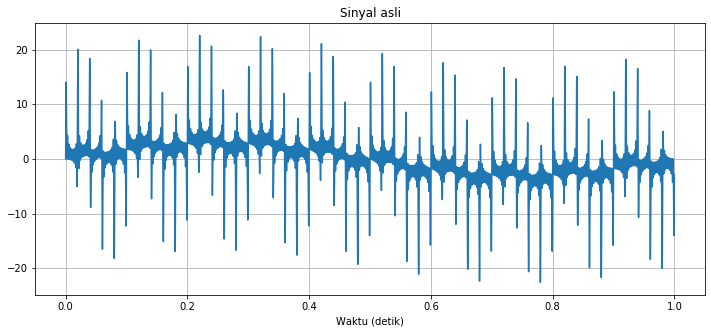

In [0]:
# Menbuat sinyal yang akan difilter
Fs = 10*10**3               # 10kHz
Ts = 1/Fs                   # sample Time
endTime = 1
t = np.arange(0.0, endTime, Ts)

inputSig = 3.*np.sin(2.*np.pi*t)

sampleFreq = np.arange(10,500,50)

for freq in sampleFreq:
    inputSig = inputSig + 2*np.sin(2*np.pi*freq*t)
    
plt.figure(figsize=(12,5))
plt.plot(t, inputSig)
plt.xlabel('Waktu (detik)')
plt.title('Sinyal asli')
plt.grid(True)
plt.show()

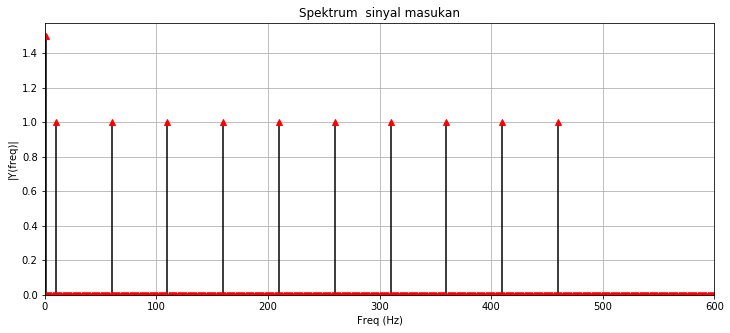

In [0]:
draw_FFT_Graph(inputSig, Fs, title='Spektrum  sinyal masukan', xlim=(0, 600))

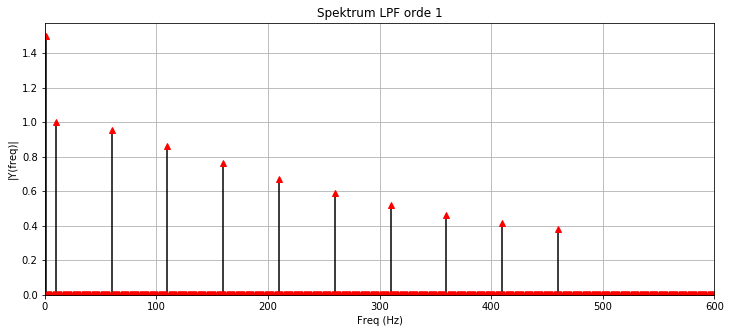

In [0]:
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'LPF')
dataLPF1 = d2f_1st(inputSig, a1, b0, b1)
draw_FFT_Graph(dataLPF1, Fs, title='Spektrum LPF orde 1', xlim=(0, 600))

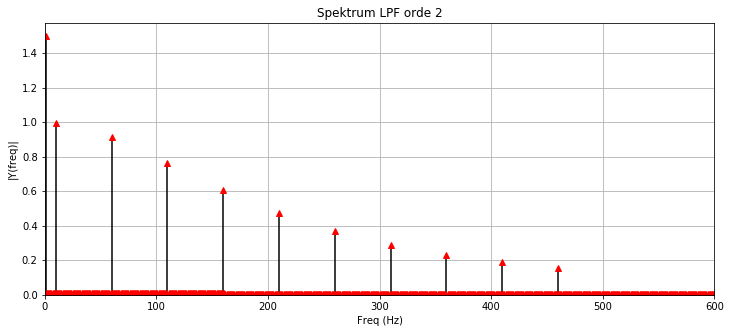

In [0]:
a1, a2, b0, b1, b2 = get2ndFilterCoeffi(200, Ts, 1, 1, 'LPF')
dataLPF2 = d2f_2nd(inputSig, a1, a2, b0, b1, b2 )
draw_FFT_Graph(dataLPF2, Fs, title='Spektrum LPF orde 2', xlim=(0, 600))

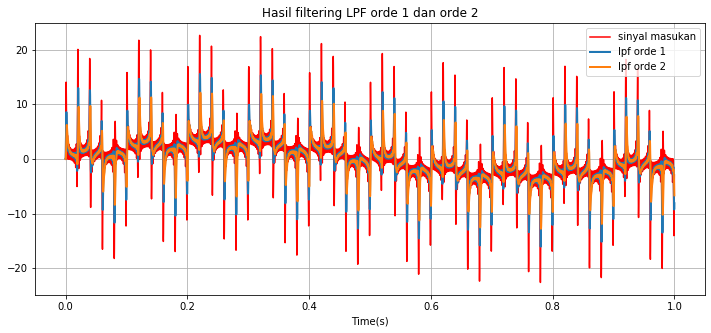

In [0]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='sinyal masukan')
plt.plot(t, dataLPF1, lw=2, label='lpf orde 1')
plt.plot(t, dataLPF2, lw=2, label='lpf orde 2')
plt.xlabel('Time(s)')
plt.title('Hasil filtering LPF orde 1 dan orde 2')
plt.legend()
plt.grid(True)
plt.show()

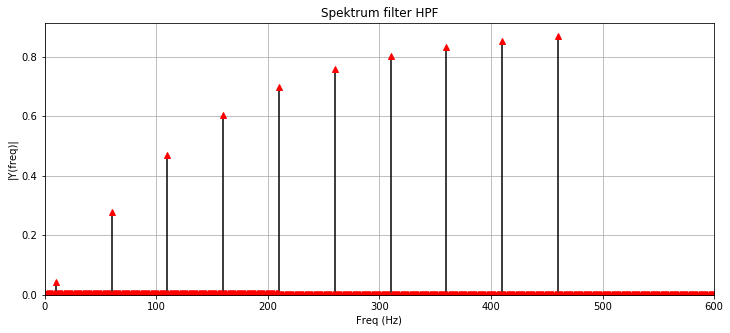

In [0]:
a1, b0, b1 = get1stFilterCoeffi(200, Ts, 'HPF')
dataHPF1 = d2f_1st(inputSig, a1, b0, b1)
draw_FFT_Graph(dataHPF1, Fs, title='Spektrum filter HPF orde 1', xlim=(0, 600))

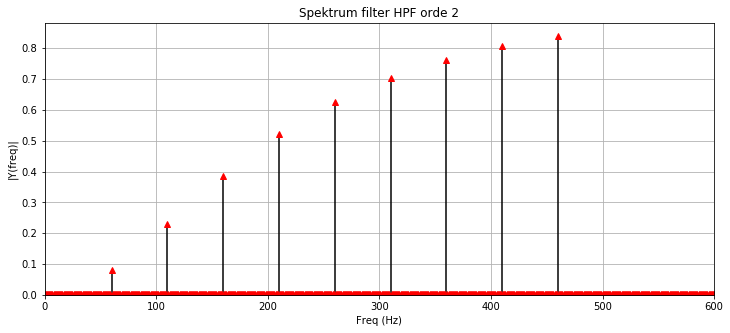

In [0]:
a1, a2, b0, b1, b2 = get2ndFilterCoeffi(200, Ts, 1, 1, 'HPF')
dataHPF2 = d2f_2nd(inputSig, a1, a2, b0, b1, b2 )
draw_FFT_Graph(dataHPF2, Fs, title='Spektrum filter HPF orde 2', xlim=(0, 600))

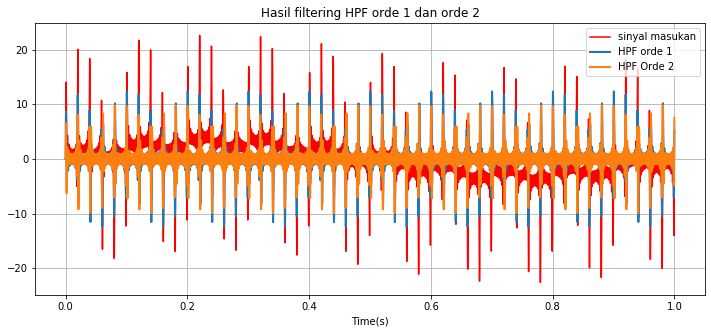

In [0]:
plt.figure(figsize=(12,5))
plt.plot(t, inputSig, 'r', label='sinyal masukan')
plt.plot(t, dataHPF1, lw=2, label='HPF orde 1')
plt.plot(t, dataHPF2, lw=2, label='HPF Orde 2')
plt.xlabel('Time(s)')
plt.title('Hasil filtering HPF orde 1 dan orde 2')
plt.legend()
plt.grid(True)
plt.show()